# Insanity
Messy jupyter notebook that I used for a couple of weeks

May be outdated and not work well

In [5]:
from algos import *
import algos as alg
from write import *
import cv2 as cv
import numpy as np
from main import *

leaf = cv.imread("orig/Test_10.jpg", 0)

def pool_party(imgs, f):
    with pool.Pool(12) as p:
        return p.map(f, imgs)

In [11]:
def extract_features(image_path):
    img = cv.imread(image_path, 0)
    img = segment(img) * enhance(img)
    hist = cv.calcHist([img], [0], None, [255], [0, 256], accumulate=False)
    return np.append(hist.ravel(), intensity_feats(hist))

intensity_feats(apple)

c:\Users\vasja\Documents\Projects\Python\image-processing\algos.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(hist)
c:\Users\vasja\Documents\Projects\Python\image-processing\algos.py:51: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(hist)


[153.9065183374083,
 129.0,
 5183.637554577291,
 50147072,
 nan,
 nan,
 6.706862336602774]

## General Features

In [2]:
intensity_feats(gen_hist(gray_ivy2))

[0.051670507, 0.0, 0.027339948, 0.0, 3.5690205, 12.52728, 3.2451725]

## Box Counting

In [ ]:
def bcds(
    img, grid_sizes=[2, 4, 8, 16, 32, 64, 128, 256], apply=enh_seg
):
    height = 600
    img_resized = cv2.resize(img, (int(height * img.shape[1] / img.shape[0]), height))
    img_bw = apply(img_resized)
    counts = []
    for size in grid_sizes:
        count = 0
        for i in range(0, img_bw.shape[0] - size, size):
            for j in range(0, img_bw.shape[1] - size, size):
                if np.sum(img_bw[i : i + size, j : j + size]) > 0:
                    count += 1
        counts.append(count)

    # calculate the box-counting dimension
    log_sizes = np.log(grid_sizes)
    log_counts = np.log(np.array(counts) + 1)
    return (log_counts[-1] - log_counts[0]) / (log_sizes[-1] - log_sizes[0]), counts

In [4]:
print(box_counting_dim(gray_ivy, [gray_ivy, gray_ivy2, gray_oak_atln, gray_oak_east]))
print(box_counting_dim(gray_ivy2, [gray_ivy, gray_ivy2, gray_oak_atln, gray_oak_east]))

[0.0, -0.10807118604976629, -0.14738956944367088, -0.15037877448158277]
[0.10807118604976629, 0.0, -0.03931838339390459, -0.04230758843181648]


In [3]:
res = pool_party(example_images, box_counting_dim_single)
print(res)

[-1.8110488744315807, -1.8673278219271174, -1.9066448190236625, -1.9472070224400893, -1.9153348065201028, -1.7772892636751898]


In [27]:
def process_image(image_path):
    import cv2 as cv
    from main import box_counting_dim_single
    img = cv.imread(image_path, 0)
    return box_counting_dim_single(img)

def process_plants(plants):
    results = []
    with pool.Pool(12) as p:
        for plant in range(len(plants)):
                plant_results = p.map(process_image, plants[plant])
                for image_idx, image_path in enumerate(plants[plant]):
                    results.append((image_path, plant_results[image_idx]))
    return results

In [159]:
box_list = process_plants(test_images_paths)

In [134]:
def compare(list):
    res = []
    for (rname, rv) in list:
        min = ["", 100, 0]
        for (name, v) in list:
            if rname is not name:
                if abs(rv - v) < min[1]:
                    min[0] = name
                    min[1] = abs(rv - v)
        if min[0].startswith("toxic") and rname.startswith("toxic"):
            min[2] = 2
        if min[0].startswith("nontoxic") and rname.startswith("nontoxic"):
            min[2] = 3
        if (min[0].startswith("nontoxic") and rname.startswith("toxic")):
            min[2] = 4
        if (min[0].startswith("toxic") and rname.startswith("nontoxic")):
            min[2] = 5
        if min[0].split("/")[1] == rname.split("/")[1]:
            min[2] = 1
        res.append(min)
    return res

In [135]:
matches = 0
toxicm = 0
nontoxicm = 0
toxicmismatch = 0
nontoxicmismatch = 0
mismatch = 0
for [_, _, val] in compare(list):
    if val == 1:
        matches +=1
    elif val == 2:
        toxicm +=1
    elif val == 3:
        nontoxicm +=1
    elif val == 4:
        toxicmismatch +=1
    elif val == 5:
        nontoxicmismatch +=1
    else:
        mismatch+=1
print((matches, toxicm, nontoxicm, mismatch))
print((matches/300, toxicm/300, nontoxicm/300, toxicmismatch/300, nontoxicmismatch/300,mismatch/300))

(36, 68, 66, 0)
(0.12, 0.22666666666666666, 0.22, 0.20666666666666667, 0.22666666666666666, 0.0)


## Chain Codes

In [58]:
chan = generate_chain_code(apple)

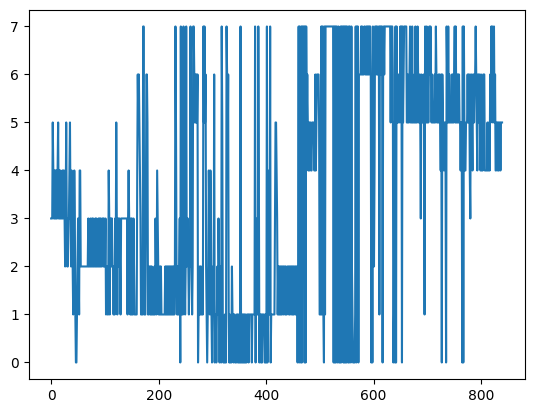

In [59]:
plt.plot(np.linspace(0, len(chan), len(chan)), chan)
plt.savefig("apple")

In [40]:
from dtw import dtw
ch1 = generate_chain_code(apple)
def distance(x, y):
    return abs(x - y)
#[dtw(ch1, generate_chain_code(img), distance)[0] for img in example_images]
ch1

[3,
 3,
 3,
 5,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 2,
 3,
 5,
 3,
 2,
 2,
 3,
 3,
 4,
 5,
 3,
 2,
 4,
 3,
 2,
 1,
 2,
 4,
 3,
 1,
 0,
 0,
 1,
 2,
 3,
 2,
 1,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 4,
 3,
 1,
 3,
 3,
 2,
 3,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 5,
 3,
 1,
 3,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 4,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 6,
 5,
 6,
 5,
 4,
 3,
 1,
 1,
 2,
 1,
 7,
 7,
 1,
 1,
 1,
 3,
 6,
 6,
 5,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 4,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 7,
 5,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 0,
 7,
 3,
 1,
 2,
 1,
 7,
 3,
 2,
 1,


In [66]:
def find_contours(img):
    contours, _ = cv2.findContours(dilate(canny(img, 50)), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

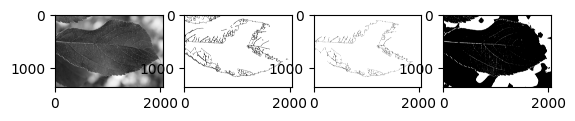

In [67]:
img = leaf
contours = find_contours(img)
largest_contour = max(contours, key=cv.contourArea)
test(
    img,
    [
        identity,
        lambda img: cv2.drawContours(
            np.zeros_like(img) + 255, contours, -1, (0, 255, 0), 2
        ),
        lambda img: cv2.drawContours(
            np.zeros_like(img) + 255, largest_contour, -1, (0, 255, 0), 2
        ),
        otsu,
    ],
)

In [68]:
wrt.multi_save(
    "contours",
    [
        ("apple", apple),
        ("leaf", leaf),
        ("ivy2", gray_ivy2),
        ("oak_east", gray_oak_east),
        ("oak_atln", gray_oak_atln),
        ("ivy", gray_ivy),
        ("sumac", gray_sumac),
    ],
    [
        (
            "full",
            lambda img: cv2.drawContours(
                np.zeros_like(img) + 255, find_contours(img), -1, (0, 255, 0), 2
            ),
        ),
        (
            "largest",
            lambda img: cv2.drawContours(
                np.zeros_like(img) + 255, max(find_contours(img), key=cv.contourArea), -1, (0, 255, 0), 2
            ),
        ),
    ],
)

## Area

71535.0
3189.5760169029236
0.38152
3.6452297336033412


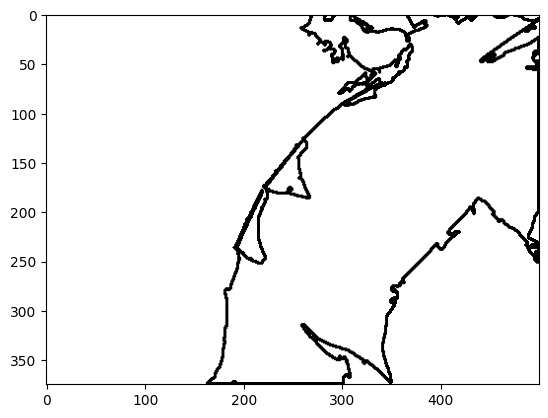

In [39]:
img = gray_sumac
total_pixels = img.shape[0] * img.shape[1]
contours = find_contours(img)
largest_contour = max(contours, key=cv.contourArea)
area = area_feat(img)[0]
perim = cv2.arcLength(largest_contour, True)
print(area)
print(perim)
print(area / total_pixels)
print(perim / (img.shape[0] + img.shape[1]))
test(
    img,
    [lambda img: area_feat(img)[1]]
)

In [190]:
def area_feata(img):
    contours = sorted(find_contours(img), key=cv2.contourArea, reverse=True)
    largest_contour = contours[0]
    return cv2.contourArea(largest_contour), cv2.arcLength(largest_contour, True)


## Local Binary Pattern

In [8]:
def calculate_lbp_feature(img, kernel_size=3, n_points=8):
    lbp = np.zeros_like(img)
    center_points = [
        (i, j)
        for i in range(kernel_size, img.shape[0] - kernel_size)
        for j in range(kernel_size, img.shape[1] - kernel_size)
    ]

    def calculate_lbp(center):
        import numpy as np
        i, j = center
        center_value = img[i, j]
        code = 0
        for k in range(n_points):
            x = i + int((kernel_size - 1) * np.cos(2 * np.pi * k / n_points))
            y = j - int((kernel_size - 1) * np.sin(2 * np.pi * k / n_points))
            if img[x, y] > center_value:
                code += 2**k
        return code

    codes = []
    #with pool.Pool(12) as p:
        #codes = p.map(calculate_lbp, center_points)
    for cent in center_points:
        codes.append(calculate_lbp(cent))

    for i, center in enumerate(center_points):
        lbp[center[0], center[1]] = codes[i]

    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(2**n_points + 1))
    hist = hist.astype("float")
    hist /= hist.sum()
    feature_vector = hist.flatten()
    return feature_vector, lbp

In [11]:
def min_max_lbp_pixel(img, x, y, threshold):
    import numpy as np
    center = img[x, y]
    values = []
    for i in range(x-1, x+2):
        for j in range(y-1, y+2):
            if i == x and j == y:
                continue
            if img[i, j] >= center:
                values.append(1)
            else:
                values.append(0)
    if len(values) == 0:
        return 0
    min_val = min(values)
    max_val = max(values)
    if max_val - min_val >= threshold:
        return 0
    else:
        pattern = np.packbits(values)
        return np.uint8(pattern)

def min_max_lbp(img, threshold=5, pool_size=12):
    with pool.Pool(pool_size) as p:
        rows, cols = img.shape
        result = np.zeros((rows, cols), dtype=np.uint8)
        indices = [(i, j, threshold) for i in range(1, rows-1) for j in range(1, cols-1)]
        patterns = p.starmap(min_max_lbp_pixel, [(img, i, j, threshold) for (i, j, threshold) in indices])
        for i, j in enumerate(indices):
            result[j[0], j[1]] = patterns[i]
        hist, _ = np.histogram(result, bins=np.arange(255))
        hist = hist.astype("float")
        hist /= hist.sum()
        return hist, result

In [30]:
img_n = (leaf, "leaf")
for k in [3, 5, 9]:
    img_lbp = calculate_lbp_feature(img_n[0], k)
    plt.plot(img_lbp[0])
    plt.savefig(f"figs/{img_n[1]}/lbp_hist_k={k}")
    plt.close()
    cv.imwrite(f"lbp/{img_n[1]}/lbp_k={k}.png", img_lbp[1])

In [91]:
oak_atln_lbp = calculate_lbp_feature(gray_oak_atln)

In [9]:
apple_lbp = calculate_lbp_feature(apple)

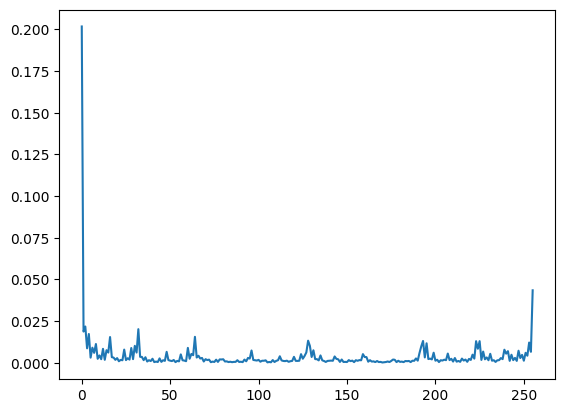

In [145]:
plt.plot(ivy2_lbp)
plt.savefig("ivy2_lbp")

In [78]:
test_images_lbps = [[(plant, calculate_lbp_feature(cv.imread(plant, 0), 9)) for plant in plants] for plants in test_images_paths]

In [69]:
from special_list import list
test_images_lbps = list

In [70]:
def flatten(lst):
    return [item for sublist in lst for item in sublist]

In [195]:
def process_imagex(image_path):
    import cv2 as cv
    from main import find_contours
    img = cv.imread(image_path, 0)
    contours = sorted(find_contours(img), key=cv.contourArea, reverse=True)
    largest_contour = contours[0]
    return cv.contourArea(largest_contour), cv.arcLength(largest_contour, True)

def process_plantsx(plants):
    results = []
    with pool.Pool(12) as p:
        for plant in range(len(plants)):
                plant_results = p.map(process_imagex, plants[plant])
                for image_idx, image_path in enumerate(plants[plant]):
                    results.append((image_path, plant_results[image_idx]))
    return results

def process_image(image_path):
    import cv2 as cv
    from main import intensity_feats, gen_hist
    img = cv.imread(image_path, 0)
    return intensity_feats(gen_hist(img))

def process_plants(plants):
    results = []
    with pool.Pool(12) as p:
        for plant in range(len(plants)):
                plant_results = p.map(process_image, plants[plant])
                for image_idx, image_path in enumerate(plants[plant]):
                    results.append((image_path, plant_results[image_idx]))
    return results

In [79]:
#ifs_list = process_plants(test_images_paths)
#box_list
#area_list = process_plantsx(test_images_paths)
list = flatten(test_images_lbps)

In [ ]:
def process_image(image_path):
    import cv2 as cv
    from main import intensity_feats, gen_hist
    img = cv.imread(image_path, 0)
    return gen_hist(img)

def process_plants(plants):
    results = []
    with pool.Pool(12) as p:
        for plant in range(len(plants)):
                plant_results = p.map(process_image, plants[plant])
                for image_idx, image_path in enumerate(plants[plant]):
                    results.append((image_path, plant_results[image_idx]))
    return results

In [80]:
#hists = process_plants(test_images_paths)
#fin = []
#for idx in range(len(list)):
    #fin.append(
        #[list[idx][0], np.concatenate((area_list[idx][1], [box_list[idx][1]], ifs_list[idx][1], list[idx][1], hists[idx][1]))]
        #)
fin = list

In [87]:
def compare(list):
    res = []
    for [rname, (rv, _)] in list:
        min = ["/", 100000, 0]
        for [name, (v, _)] in list:
            if rname is not name:
                chi = cv.compareHist(rv.astype(np.float32), v.astype(np.float32), 1)
                if chi < min[1]:
                    min[0] = name
                    min[1] = chi
        if min[0].startswith("toxic") and rname.startswith("toxic"):
            min[2] = 2
        if min[0].startswith("nontoxic") and rname.startswith("nontoxic"):
            min[2] = 3
        if (min[0].startswith("nontoxic") and rname.startswith("toxic")):
            min[2] = 4
        if (min[0].startswith("toxic") and rname.startswith("nontoxic")):
            min[2] = 5
        if min[0].split("/")[1] == rname.split("/")[1]:
            min[2] = 1
        res.append(min)
    return res

In [88]:
matches = 0
toxicm = 0
nontoxicm = 0
toxicmismatch = 0
nontoxicmismatch = 0
mismatch = 0
for [_, _, val] in compare(fin):
    if val == 1:
        matches +=1
    elif val == 2:
        toxicm +=1
    elif val == 3:
        nontoxicm +=1
    elif val == 4:
        toxicmismatch +=1
    elif val == 5:
        nontoxicmismatch +=1
    else:
        mismatch+=1
print((matches, toxicm, nontoxicm, mismatch))
print((matches/300, toxicm/300, nontoxicm/300, toxicmismatch/300, nontoxicmismatch/300,mismatch/300))

(76, 48, 41, 0)
(0.25333333333333335, 0.16, 0.13666666666666666, 0.23, 0.22, 0.0)


In [12]:
cv.compareHist(oak_atln_lbp.astype(np.float32), ivy_lbp.astype(np.float32), 1)

0.06120032901807301

## Mass Compares (WIP)

In [5]:
collect = []
if __name__ == '__main__':
    collect = thread_party(enhance, lambda img: global_thresh(img, 130))
    print(count_successes_fails(collect))
[x/300 for x in count_successes_fails(collect)]

NameError: name 'alg' is not defined

In [4]:
[x/300 for x in count_successes_fails(collect)]

[0.10666666666666667, 0.07, 0.41, 0.43, 0.09]

## TESTING HEREAFTER

In [20]:
def dflatten(l):
    return [item for sublist in [item for sublist in l for item in sublist] for item in sublist]
count_sucesses_fails(dflatten(collect))

16

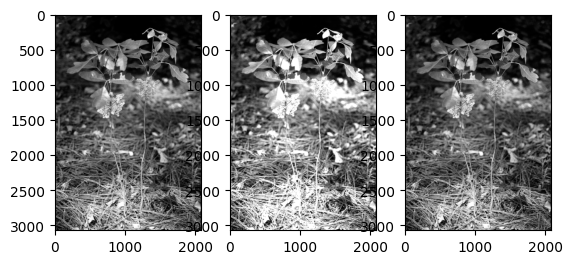

In [29]:
test(
    gray_oak_atln,
    [lambda img: magic(img)[0], lambda img: magic(img)[1], identity],
)


In [32]:
multi_save(
    "midterm",
    [("oak_atln", gray_oak_atln)],
    [
        # ("t-130", lambda img: global_thresh(img, 130)),
    ],
)


In [62]:
def loop(iimg, feats=False):
    successes = []
    f = combine_enh_seg
    for lst, name in [
        (test_image_numbers, p)
        for p in [
            "poison_ivy",
            "poison_ivy_west",
            "poison_oak_west",
            "poison_oak_east",
            "poison_sumac",
            "bear_oak",
            "boxelder",
            "fragrant_sumac",
            "jack_in_the_pulpit",
            "virginia_creeper",
        ]
    ]:
        if name.__contains__("poison"):  # type: ignore
            for x in lst:
                img = cv2.cvtColor(
                    cv2.imread(f"toxic_images/{name}/{x}"), cv2.COLOR_BGR2GRAY
                )
                compare = (chi_compare(f(img), f(iimg), feats), name, x)
                if compare[0] > 0.0:
                    successes.append(compare)
        else:
            for x in lst:
                img = cv2.cvtColor(
                    cv2.imread(f"nontoxic_images/{name}/{x}"), cv2.COLOR_BGR2GRAY
                )
                compare = (chi_compare(f(img), f(iimg), feats), name, x)
                if compare[0] > 0.0:
                    successes.append(compare)
    successes.sort()
    return successes
def gen_hist(img, feats=False):
    hist = cv2.calcHist([img], [0], None, [255], [0, 256], accumulate=False)
    cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)  # type: ignore
    if feats:
        hist = np.append(hist, [np.median(hist), np.mean(hist), np.amax(hist), np.amin(hist)]) # type: ignore
    return hist
def chi_compare(img1, img2, feats=False):
    return cv2.compareHist(gen_hist(img1, feats), gen_hist(img2, feats), 1)


In [96]:
lop = loop(gray_ivy2, True)
[print("TRUE: ", c) if "gray_oak_atln" == c[0] else print("FALSE:", c) for c in lop]
print("avg", np.mean(np.array([s[0] for s in lop])))
print("median", np.median(np.array([s[0] for s in lop])))

FALSE: (1.1192305981855308, 'jack_in_the_pulpit', '004.jpg')
FALSE: (1.1429769852936544, 'fragrant_sumac', '000.jpg')
FALSE: (1.2388007442015334, 'fragrant_sumac', '001.jpg')
FALSE: (1.256539794916319, 'poison_oak_west', '009.jpg')
FALSE: (1.2825767186895658, 'poison_oak_west', '000.jpg')
FALSE: (1.3212473788570749, 'virginia_creeper', '004.jpg')
FALSE: (1.3479654774869505, 'poison_ivy', '009.jpg')
FALSE: (1.3821690735322723, 'poison_ivy_west', '000.jpg')
FALSE: (1.4167690497996737, 'poison_ivy_west', '002.jpg')
FALSE: (1.4921358777892237, 'virginia_creeper', '008.jpg')
FALSE: (1.5289563753115125, 'poison_ivy', '004.jpg')
FALSE: (1.5584889716970844, 'virginia_creeper', '006.jpg')
FALSE: (1.5594692420874743, 'jack_in_the_pulpit', '002.jpg')
FALSE: (1.5660263791360804, 'poison_ivy', '003.jpg')
FALSE: (1.5982939623297812, 'boxelder', '001.jpg')
FALSE: (1.6422536489457074, 'boxelder', '000.jpg')
FALSE: (1.6808226361134015, 'poison_sumac', '000.jpg')
FALSE: (1.8764088847207272, 'poison_oak_

In [97]:
def count_successes_fails(collect):
    return (
        sum([1 if c[0] == c[1][0][1] else 0 for c in dflatten(collect)]),
        sum(
            [
                1
                if c[0].__contains__("poison") and c[1][0][1].__contains__("poison")
                else 0
                for c in dflatten(collect)
            ]
        ),
        sum(
            [
                1
                if (not c[0].__contains__("poison")) and (not c[1][0][1].__contains__("poison"))
                else 0
                for c in dflatten(collect)
            ]
        ),
        sum(
            [
                1
                if c[0].__contains__("poison") and (not c[1][0][1].__contains__("poison"))
                else 0
                for c in dflatten(collect)
            ]
        ),
        sum(
            [
                1
                if (not c[0].__contains__("poison")) and c[1][0][1].__contains__("poison")
                else 0
                for c in dflatten(collect)
            ]
        ),
    )

In [98]:
count_successes_fails(collect)

(16, 19, 31, 31, 19)